<a href="https://colab.research.google.com/github/qAp/fsdl-text-recognizer-2021-labs/blob/lab3/lab3/colab/02_look_at_emnist_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pytorch_lightning -q
! pip install wandb -q

     |████████████████████████████████| 916 kB 7.0 MB/s 
     |████████████████████████████████| 118 kB 68.6 MB/s 
     |████████████████████████████████| 829 kB 45.5 MB/s 
     |████████████████████████████████| 272 kB 62.5 MB/s 
     |████████████████████████████████| 636 kB 65.4 MB/s 
     |████████████████████████████████| 1.3 MB 57.0 MB/s 
     |████████████████████████████████| 142 kB 76.0 MB/s 
     |████████████████████████████████| 294 kB 71.4 MB/s 
     |████████████████████████████████| 1.6 MB 8.5 MB/s 
     |████████████████████████████████| 170 kB 56.0 MB/s 
     |████████████████████████████████| 97 kB 7.4 MB/s 
     |████████████████████████████████| 133 kB 57.4 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 


In [2]:
! git clone https://github.com/qAp/fsdl-text-recognizer-2021-labs.git
%cd /content/fsdl-text-recognizer-2021-labs/
! git checkout lab3

Cloning into 'fsdl-text-recognizer-2021-labs'...
remote: Enumerating objects: 839, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 839 (delta 181), reused 173 (delta 154), pack-reused 568
Receiving objects: 100% (839/839), 18.95 MiB | 21.85 MiB/s, done.
Resolving deltas: 100% (419/419), done.
/content/fsdl-text-recognizer-2021-labs


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! cp -r /content/drive/MyDrive/fsdl-text-recognizer-2021-labs/data/downloaded/ /content/fsdl-text-recognizer-2021-labs/data/.


In [6]:
%cd /content
%env PYTHONPATH=.:$PYTHONPATH

/content
env: PYTHONPATH=.:$PYTHONPATH


In [12]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import argparse

%cd /content/fsdl-text-recognizer-2021-labs/lab3
from text_recognizer.data.emnist_lines import EMNISTLines
from text_recognizer.data.emnist_lines import construct_image_from_string
from text_recognizer.data.emnist_lines import get_samples_by_char
from text_recognizer.data.sentence_generator import SentenceGenerator

/content/fsdl-text-recognizer-2021-labs/lab3


# Synthetic Dataset

In [11]:
sentence_generator = SentenceGenerator()
for _ in range(4):
    print(sentence_generator.generate(max_length=32))

on Daves
I said I would Pam said They
and
YMCA the Knights


In [25]:
args = argparse.Namespace(max_length=16, max_overlap=0)
dataset = EMNISTLines(args)
dataset.prepare_data()
dataset.setup()

print(dataset)
print(dataset.mapping)

EMNISTLinesDataset loading data from HDF5...
EMNIST Lines Dataset
Min overlap: 0
Max overlap: 0
Num classes: 83
Dims: (1, 28, 448)
Output dims: (16, 1)
Train/val/test sizes: 10000, 2000, 2000
Batch x stats: (torch.Size([128, 1, 28, 448]), torch.float32, tensor(0.), tensor(0.0748), tensor(0.2337), tensor(1.))
Batch y stats: (torch.Size([128, 16]), torch.int64, tensor(3), tensor(66))

['<B>', '<S>', '<E>', '<P>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '?']


In [27]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join(dataset.mapping[i] for i in y)

y_example = dataset.data_train[0][1]
print(y_example, y_example.shape)
convert_y_label_to_string(y_example)

[48 59 66 45 54 57 42 44  3  3  3  3  3  3  3  3] (16,)


'it force<P><P><P><P><P><P><P><P>'

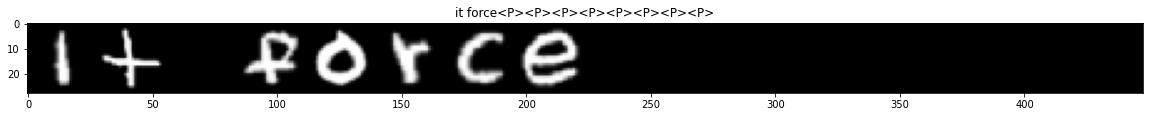

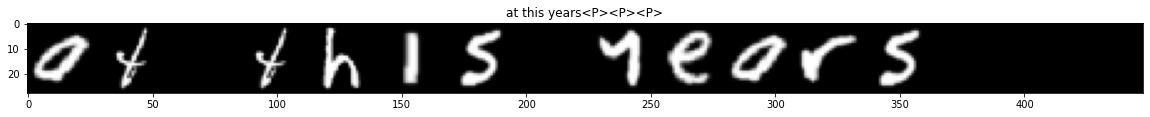

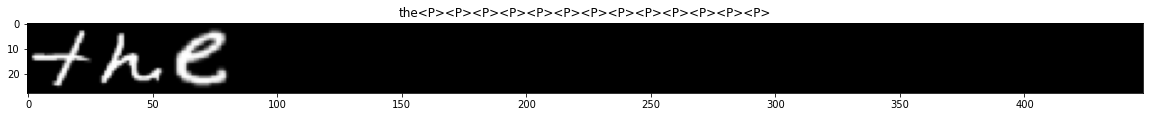

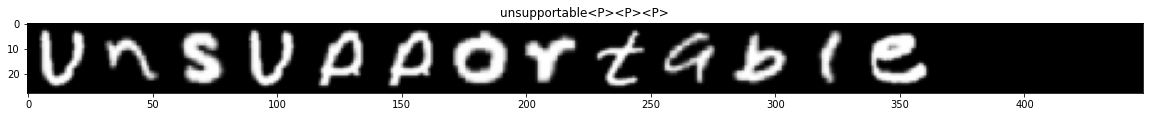

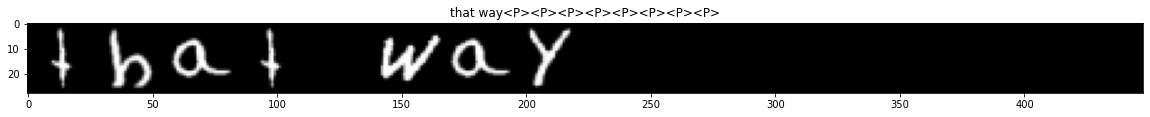

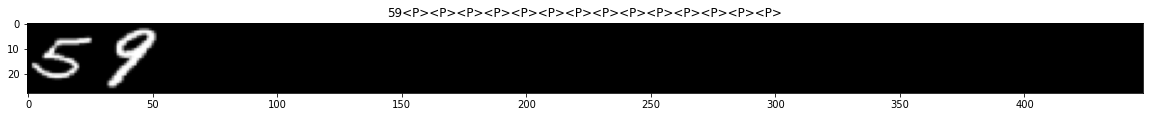

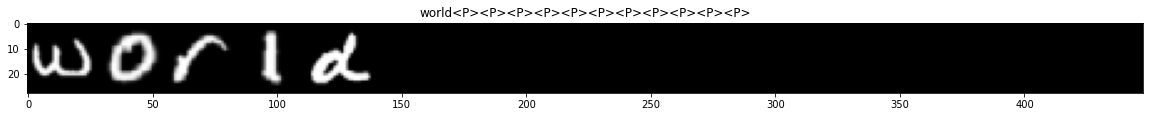

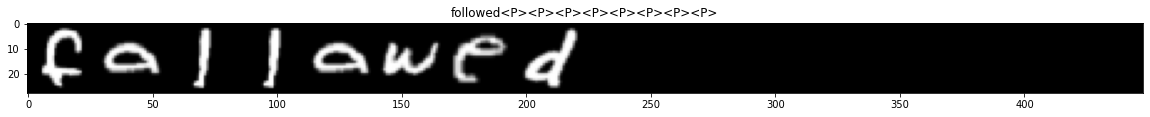

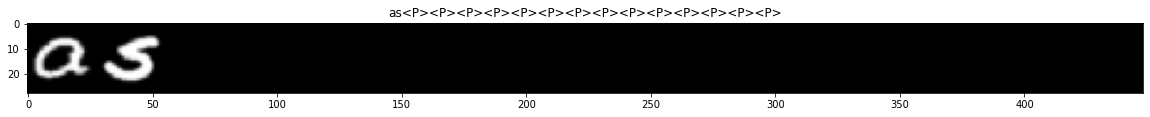

In [31]:
num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    x, y = dataset.data_train[i]
    sentence = convert_y_label_to_string(y)
    plt.figure(figsize=(20, 20))
    plt.imshow(x.squeeze(0), cmap='gray')
    plt.title(sentence);

# Making it more difficult

In [32]:
args = argparse.Namespace(max_length=34, max_overlap=.33)

data = EMNISTLines(args)
data.prepare_data()
data.setup()

print(data)
print(data.mapping)

EMNISTLinesDataset generating data for train...
EMNISTLinesDataset generating data for val...


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.prepare_data has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.prepare_data.
  f"DataModule.{name} has already been called, so it will not be called again. "
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  f"DataModule.{name} has already been called, so it will not be called again. "


EMNISTLinesDataset generating data for test...
EMNISTLinesDataset loading data from HDF5...
EMNIST Lines Dataset
Min overlap: 0
Max overlap: 0.33
Num classes: 83
Dims: (1, 28, 952)
Output dims: (34, 1)
Train/val/test sizes: 10000, 2000, 2000
Batch x stats: (torch.Size([128, 1, 28, 952]), torch.float32, tensor(0.), tensor(0.0705), tensor(0.2274), tensor(1.))
Batch y stats: (torch.Size([128, 34]), torch.int64, tensor(3), tensor(66))

['<B>', '<S>', '<E>', '<P>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '?']


In [33]:
data

EMNIST Lines Dataset
Min overlap: 0
Max overlap: 0.33
Num classes: 83
Dims: (1, 28, 952)
Output dims: (34, 1)
Train/val/test sizes: 10000, 2000, 2000
Batch x stats: (torch.Size([128, 1, 28, 952]), torch.float32, tensor(0.), tensor(0.0748), tensor(0.2336), tensor(1.))
Batch y stats: (torch.Size([128, 34]), torch.int64, tensor(3), tensor(66))

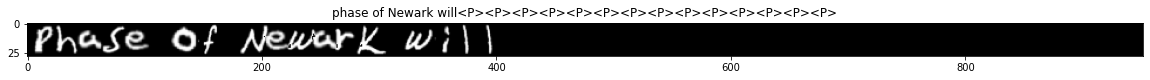

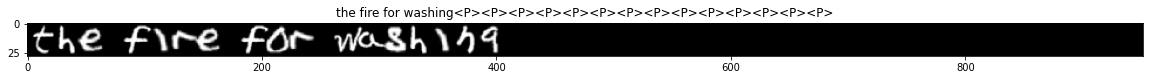

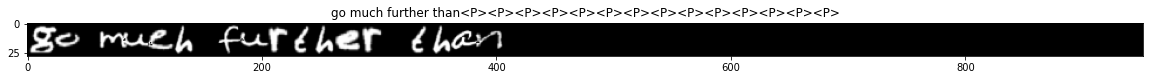

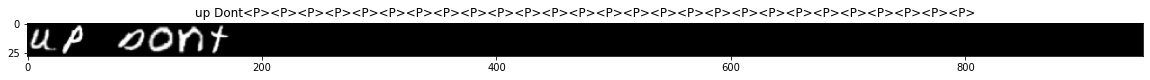

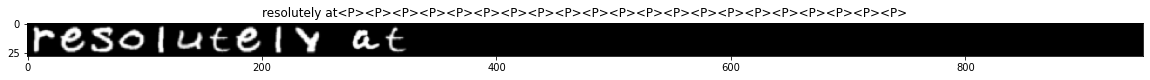

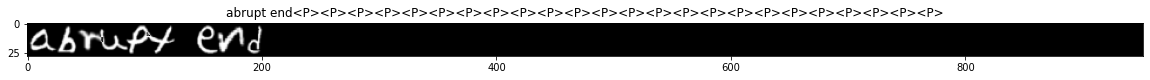

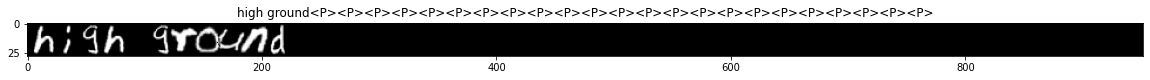

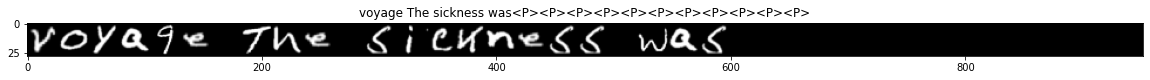

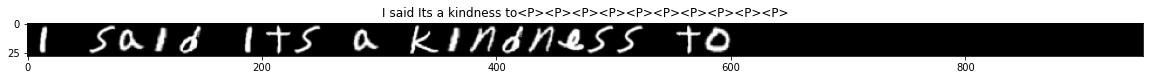

In [34]:
num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    x, y = data.data_train[i]
    sentence = convert_y_label_to_string(y)

    plt.figure(figsize=(20, 20))
    plt.imshow(x.squeeze(0), cmap='gray')
    plt.title(sentence);

In [37]:
! ls /content/fsdl-text-recognizer-2021-labs/data/processed/emnist_lines/

ml_16_o0.000000_0.000000_ntr10000_ntv2000_nte2000_False.h5
ml_34_o0.000000_0.330000_ntr10000_ntv2000_nte2000_False.h5
